# Desafío 1

Responde a todas las preguntas dibujando un gráfico.

In [39]:
# libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

**0. Load seaborn dataset "tips"**

In [40]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [41]:
tips.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

**1. ¿Cuál es el día preferido para comer?**

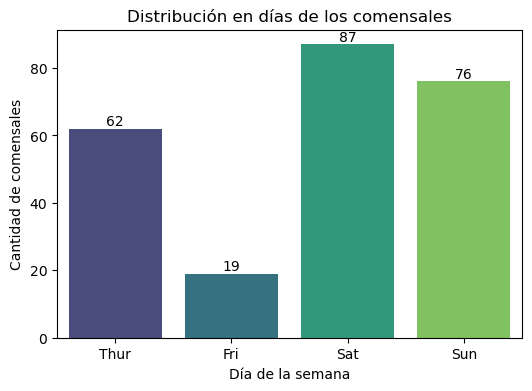

In [58]:
# Opcion 1

# Calcular las cuentas de cada día y ordenarlas de mayor a menor
counts = tips['day'].value_counts().sort_values(ascending= False)

# Crear una figura
plt.figure(figsize=(6, 4))

# Crear el gráfico de barras con Seaborn
ax = sns.barplot(x=counts.index, y=counts.values, palette="viridis")

# Añadir título y etiquetas
plt.title('Distribución en días de los comensales')
plt.xlabel("Día de la semana")
plt.ylabel("Cantidad de comensales")

# Añadir anotaciones encima de las barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Mostrar el gráfico
plt.show()

In [43]:
serie_tips = tips.day.value_counts()
serie_tips

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

Text(0.5, 0, 'Dias de la semana')

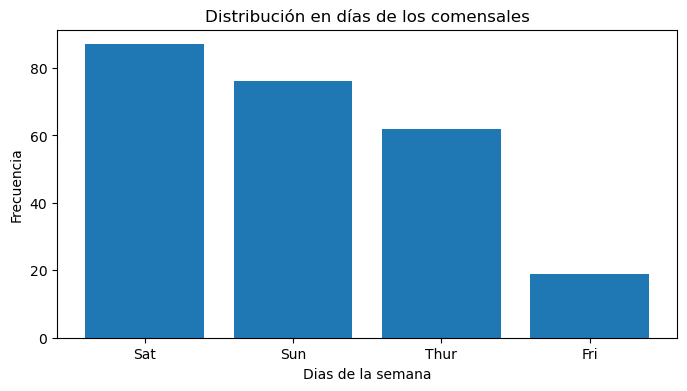

In [44]:
# Opcion 2
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(serie_tips.index, serie_tips)
ax.set_title('Distribución en días de los comensales')
ax.set_ylabel('Frecuencia')
ax.set_xlabel('Dias de la semana')

**Explicación**

fig es un objeto de tipo Figure que representa toda la figura del gráfico.
ax es un objeto de tipo Axes que representa el área de los ejes donde se dibujará el gráfico. La figura puede contener múltiples ejes (ax), pero en este caso solo hay uno.

El parámetro figsize=(8, 4) establece el tamaño de la figura en pulgadas.
ax.bar(serie_tips.index, serie_tips): Dibuja un gráfico de barras en el objeto ax usando los datos en serie_tips. serie_tips.index contiene las categorías del eje x (días de la semana), y serie_tips contiene las cuentas correspondientes (frecuencia).

ax.set_title('Distribución en días de los comensales'): Establece el título del gráfico.

ax.set_ylabel('Frecuencia'): Establece la etiqueta del eje y.

ax.set_xlabel('Días de la semana'): Establece la etiqueta del eje x.

**2. ¿Qué días de la semana hay más pagadores hombres que mujeres?**

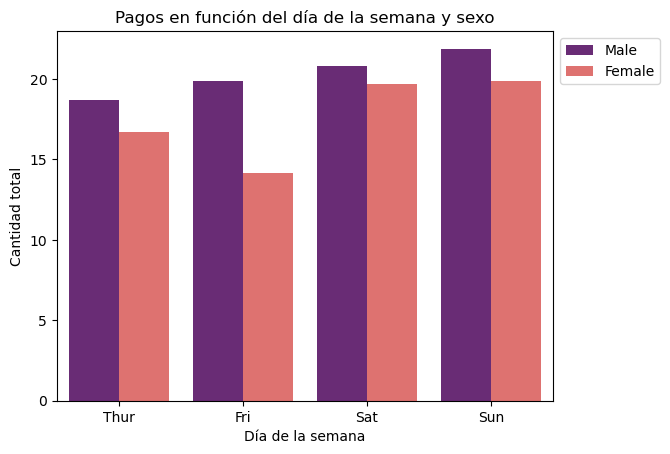

In [45]:
#Opción 1 
sns.barplot(x="day", y="total_bill", hue="sex", data=tips, errorbar=None,  palette='magma')
plt.title("Pagos en función del día de la semana y sexo")
plt.xlabel("Día de la semana")
plt.ylabel("Cantidad total")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show();

Hay mas pagadores hombres que mujeres los dias jueves, viernes sabado y domingo. 

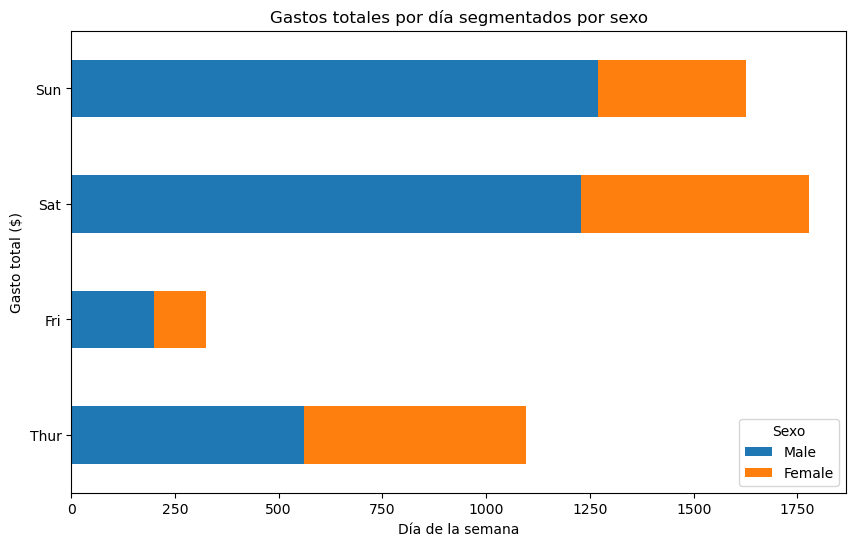

In [61]:
#Opción 2

# Definir el orden de los días de la semana
days_order = ["Thur", "Fri", "Sat", "Sun"]

# Agrupar los datos por día y sexo, y sumar los gastos de total_bill
data = tips.groupby(['day', 'sex'])['total_bill'].sum().unstack().fillna(0)

# Asegurar el orden correcto de los días de la semana
data = data.reindex(days_order)

# Crear un gráfico de barras apiladas
data.plot(kind='barh', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])

# Añadir título y etiquetas
plt.title('Gastos totales por día segmentados por sexo')
plt.xlabel('Día de la semana')
plt.ylabel('Gasto total ($)')
plt.legend(title='Sexo')

# Mostrar el gráfico
plt.show()

**3. ¿Cree que los importes de las facturas cambian considerablemente según se fume?**.

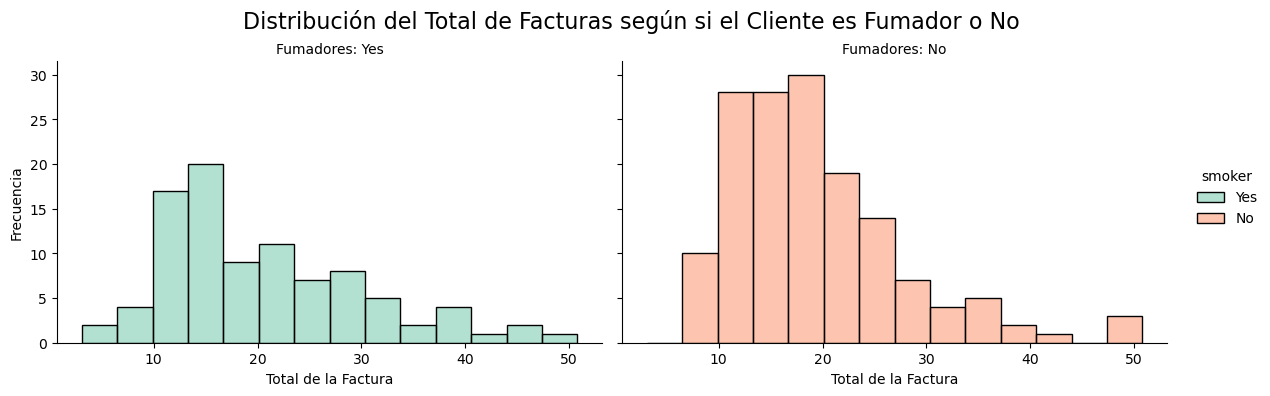

In [47]:
# Crear el gráfico de distribución con Seaborn
g = sns.displot(
    data=tips, 
    x="total_bill", 
    hue="smoker", 
    col="smoker", 
    kind="hist", 
    height=4, 
    aspect=1.5, 
    palette="Set2"
)

# Añadir títulos y etiquetas a cada subgráfico
g.set_axis_labels("Total de la Factura", "Frecuencia")
g.set_titles("Fumadores: {col_name}")

# Mejorar el espacio entre los subgráficos
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Distribución del Total de Facturas según si el Cliente es Fumador o No', fontsize=16)

# Mostrar el gráfico
plt.show()


Podemos observar que quienes no fuman, abonan facturas mas caras que quienes si fuman. 

**4. ¿Está la propina correlacionada con la factura_total? Dibuja un gráfico de dispersión**

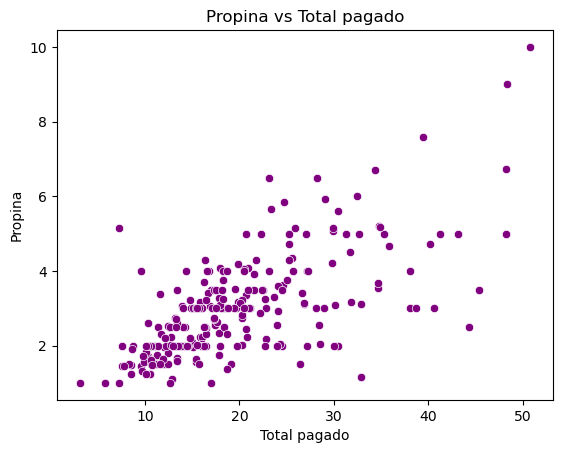

In [48]:
sns.scatterplot(data=tips, x="total_bill", y="tip", color = "purple")
plt.title("Propina vs Total pagado")
plt.xlabel("Total pagado")
plt.ylabel("Propina")
plt.show();

In [49]:
tips.corr(numeric_only= True )

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


Existe una correlacion positiva moderada entre el monto total de la cuenta y la propina. 